<h1 align="center" style="background-color:black;color:white;border-radius: 8px; padding:15px">Comprehensive Analysis of Ireland's Agriculture and Global Comparisons</h1>

## Table of Contents

- [Introduction](#Introduction)
   - Overview
   - Objective
- [Dataset Overview](#Dataset-Overview)
   - Data Sources
   - Key Variables
- [Preliminary Data Exploration](#Preliminary-Data-Exploration)
   - Import Libraries
   - Load Datasets
   - View First Five Rows of Each Dataframe
- [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
   - Correct Erroneous Datatypes
   - Data Merging
   - Drop Irrelevant Columns
   - Fix Missing Values
- [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis)
   - What are the trends in cattle stocks over time for Ireland compared to other countries?
   - How do potato production trends in Ireland compare to other countries?
   - What are the trends in livestock stocks (Cattle, Sheep, Chickens) for Ireland over the past 20 years?
- [Statistical Data Analysis](#Statistical-Data-Analysis)
   - Descriptive Statistics
   - Inferential Statistics
- [Machine Learning](#Machine-Learning)
   - Time Series Forecasting
   - Predictions
- [Key Findings and Insights](#Key-Findings-and-Insights)
   - Summary
   - Actionable Recommendations
- [Conclusion](#Conclusion)
- [References](#References)

<h2 style="background-color:black;color:white;border-radius: 8px; padding:15px">Introduction</h2>

### **Overview**

Agriculture has been fundamental to human civilization, evolving with modern technologies like data analytics, machine learning, and artificial intelligence to enhance productivity and sustainability. This exercise investigates Ireland’s agricultural sector, with a focus on key crops — **maize and potatoes** — and livestock — **cattle, chickens, and sheep** — as a baseline for comparative analysis against global trends..

Using data from FAOSTAT, maintained by the Food and Agriculture Organization (FAO), this exercise evaluates production trends, trade dynamics, and livestock statistics. By employing methodologies such as forecasting, it aims to uncover actionable insights and provide recommendations to optimize Ireland's agricultural standing.

### **Objective**

The primary objective of this exercise is to evaluate Ireland’s agricultural performance in the context of global trends and provide evidence-based recommendations for improvement. By focusing on specific crops (maize and potatoes) and livestock (cattle, chickens, and sheep), the exercise seeks to:

1. **Analyze Agricultural Production Trends**:

    - Investigate historical and current production data for the selected crops and livestock.
    - Identify patterns, anomalies, and growth trends to provide a clear understanding of Ireland's agricultural landscape.

2. **Compare Ireland’s Agricultural Sector Globally**:
    - Benchmark Ireland's agricultural performance against other countries using key metrics such as yield, production efficiency, and trade volumes.

3. **Conduct Forecasting and Predictive Analysis**:
    - Utilize machine learning models to predict future production trends and identify potential risks and opportunities.

4. **Provide Evidence-Based Recommendations**:
    - Develop actionable recommendations for policymakers, farmers, and stakeholders to improve productivity, trade balance, and economic outcomes in the sector.

<h2 style="background-color:black;color:white;border-radius: 8px; padding:15px">Dataset Overview</h2>

### **Data Source**  

The primary dataset for this research was downloaded from the **FAOSTAT** database provided by the Food and Agriculture Organization (FAO) at [https://www.fao.org/faostat/en/#data/QCL](https://www.fao.org/faostat/en/#data/QCL). The dataset covers agricultural data from **1961 to 2023** for all countries, identified using the **M49 coding system**. The selected focus areas include **Cattle, Chickens, Sheep, Maize (corn), and Potatoes**, providing a comprehensive view of these key agricultural products.  

To complement this primary dataset, an additional dataset, **Unit Definitions**, from the **FAOSTAT Definitions** section (https://www.fao.org/faostat/en/#definitions) was downloaded to provide essential metadata and standardizations. This data includes unit names and descriptions, such as "ha/cap" representing hectares per capita.  

This additional dataset will be merged with the primary dataset during the data cleaning process to enhance data clarity and usability.

### **Key Variables**  
The primary dataset contains the following key variables:  

- **Domain Code/Domain**: Represents the data category, e.g., "QCL" stands for "Crops and livestock products."  
- **Area Code (M49)/Area**: Identifies countries using the M49 coding system and their corresponding names.  
- **Element Code/Element**: Indicates the type of measurement or data recorded, such as "Stocks" for livestock.  
- **Item Code (CPC)/Item**: Refers to the specific agricultural product, e.g., "Cattle," "Maize," or "Potatoes."  
- **Year Code/Year**: Specifies the year of data collection.  
- **Unit**: Describes the unit of measurement, such as "An" (Animal numbers) or metric tons.  
- **Value**: Records the numerical value for the corresponding year, item, and element.  
- **Flag/Flag Description**: Provides additional metadata about the data, e.g., "A" for official figures or "E" for estimated values.  
- **Note**: Contains supplementary remarks or observations about the data entry.  

These variables, along with the definitions from the additional datasets, will form the basis for data analysis, ensuring consistency and accuracy throughout the exercise.

<h2 style="background-color:black;color:white;border-radius: 8px; padding:15px">Preliminary Data Exploration</h2>

### **Import Libraries**

In [1]:
# !pip install seaborn pandas matplotlib plotly scikit-learn prophet

In [2]:
# Data Manipulation libraries
import numpy as np
import pandas as pd

# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical computation 
from scipy.stats import (
    skew, 
    kurtosis, 
    levene, 
    ttest_ind, 
    mannwhitneyu, 
    wilcoxon, 
    ks_2samp, 
    kruskal, 
    shapiro
)

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Time Series Forecasting
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

# Optimization
import time
import multiprocessing

# Handle warnings
import warnings
warnings.filterwarnings('ignore')

### **Load Datasets**

In [3]:
# Primary dataset
df = pd.read_csv('/kaggle/input/cct-project-datasets/datasets/FAOSTAT_data_en_12-24-2024.csv')

# Definitions and Standards
unit_df = pd.read_csv('/kaggle/input/cct-project-datasets/datasets/FAOSTAT_data_units_12-24-2024.csv')

### **View First Five Rows of Each Dataframe**

In [4]:
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5111,Stocks,2111,Cattle,1961,1961,An,2900000.0,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5111,Stocks,2111,Cattle,1962,1962,An,3200000.0,E,Estimated value,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5111,Stocks,2111,Cattle,1963,1963,An,3300000.0,E,Estimated value,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5111,Stocks,2111,Cattle,1964,1964,An,3350000.0,E,Estimated value,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5111,Stocks,2111,Cattle,1965,1965,An,3400000.0,E,Estimated value,NaN


In [5]:
unit_df.head()

,Unit Name,Description
0,%,Percent
1,%LSU,Percent of Total Livestock Units
2,°c,Degrees celsius
3,0.1 g/An,tenth Grams per animal
4,100 g,hundred Grams


### **Use `info` Function to get Insights on Memory Usage and Missing Values**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90710 entries, 0 to 90709
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       90710 non-null  object 
 1   Domain            90710 non-null  object 
 2   Area Code (M49)   90710 non-null  int64  
 3   Area              90710 non-null  object 
 4   Element Code      90710 non-null  int64  
 5   Element           90710 non-null  object 
 6   Item Code (CPC)   90710 non-null  int64  
 7   Item              90710 non-null  object 
 8   Year Code         90710 non-null  int64  
 9   Year              90710 non-null  int64  
 10  Unit              90710 non-null  object 
 11  Value             89610 non-null  float64
 12  Flag              90710 non-null  object 
 13  Flag Description  90710 non-null  object 
 14  Note              2603 non-null   object 
dtypes: float64(1), int64(5), object(9)
memory usage: 10.4+ MB


In [7]:
unit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unit Name    65 non-null     object
 1   Description  65 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


**Observation:**

There seems to be missing values in **`df`**. This will be explored in-depth in the data cleaning section. In addition, some datatypes are best represented using object in **`df`** e.g. **year**, **Element Code** and so on. Even though some of the columns might be dropped later, it is a usually best to have data in a correct format when performing analysis.

<h2 style="background-color:black;color:white;border-radius: 8px; padding:15px">Data Cleaning and Preprocessing</h2>

### **Correct Erroneous Datatypes**

In [8]:
# Convert specified columns to object type in main dataframe
int_to_object_cols = [
    'Area Code (M49)', 'Element Code', 'Item Code (CPC)', 'Year Code', 'Year'
]
for col in int_to_object_cols:
    df[col] = df[col].astype(str)

### **Data Merging**

In [9]:
# Merge df with unit_df on Unit and Unit Name
merged_df = df.merge(unit_df,
                    left_on='Unit',
                    right_on='Unit Name',
                    how='left')

In [10]:
# Show first five rows of merged data
merged_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note,Unit Name,Description
0,QCL,Crops and livestock products,4,Afghanistan,5111,Stocks,2111,Cattle,1961,1961,An,2900000.0,A,Official figure,NaN,An,Animals
1,QCL,Crops and livestock products,4,Afghanistan,5111,Stocks,2111,Cattle,1962,1962,An,3200000.0,E,Estimated value,NaN,An,Animals
2,QCL,Crops and livestock products,4,Afghanistan,5111,Stocks,2111,Cattle,1963,1963,An,3300000.0,E,Estimated value,NaN,An,Animals
3,QCL,Crops and livestock products,4,Afghanistan,5111,Stocks,2111,Cattle,1964,1964,An,3350000.0,E,Estimated value,NaN,An,Animals
4,QCL,Crops and livestock products,4,Afghanistan,5111,Stocks,2111,Cattle,1965,1965,An,3400000.0,E,Estimated value,NaN,An,Animals


### **Drop Irrelevant Columns**

After merging our datasets, we need to clean up the dataframe by removing redundant and unnecessary columns. Here's why we're removing specific columns:

**Redundant Identifier Columns**
* `Domain Code` → Redundant with `Domain` which provides the same information in a more readable format
* `Area Code (M49)` → Redundant with `Area` column which provides location in text format
* `Item Code (CPC)` → Redundant with `Item` column which gives the name directly
* `Year Code` → Redundant with `Year` column (same information)
* `Unit Name` → Redundant with `Unit` column after our merge

**Empty/Unnecessary Columns**
* `Note` → Contains mostly NaN values and not useful for our analysis
* `Flag and Flag Description` → Data quality indicators not needed for our current analysis

**Columns We're Keeping**
* `Domain` - Category of data
* `Area` - Geographic location
* `Element` - Type of measurement
* `Item` - Specific item being measured
* `Year` - Time period
* `Unit` - Measurement unit
* `Value` - Actual measurement

These changes will give us a cleaner, more focused dataset while maintaining all essential information for our analysis.

In [11]:
# Drop redundant and unnecessary columns
merged_df = merged_df.drop(columns=[
    'Domain Code',
    'Area Code (M49)',
    'Item Code (CPC)',
    'Year Code',
    'Unit Name',
    'Note',
    'Flag',
    'Flag Description'
])

In [12]:
# Verify by displaying the first five rows 
merged_df.head()

,Domain,Area,Element Code,Element,Item,Year,Unit,Value,Description
0,Crops and livestock products,Afghanistan,5111,Stocks,Cattle,1961,An,2900000.0,Animals
1,Crops and livestock products,Afghanistan,5111,Stocks,Cattle,1962,An,3200000.0,Animals
2,Crops and livestock products,Afghanistan,5111,Stocks,Cattle,1963,An,3300000.0,Animals
3,Crops and livestock products,Afghanistan,5111,Stocks,Cattle,1964,An,3350000.0,Animals
4,Crops and livestock products,Afghanistan,5111,Stocks,Cattle,1965,An,3400000.0,Animals


### **Fix Missing Values**

In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90710 entries, 0 to 90709
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Domain        90710 non-null  object 
 1   Area          90710 non-null  object 
 2   Element Code  90710 non-null  object 
 3   Element       90710 non-null  object 
 4   Item          90710 non-null  object 
 5   Year          90710 non-null  object 
 6   Unit          90710 non-null  object 
 7   Value         89610 non-null  float64
 8   Description   90710 non-null  object 
dtypes: float64(1), object(8)
memory usage: 6.2+ MB


In [14]:
merged_df[merged_df['Value'].isna()]

,Domain,Area,Element Code,Element,Item,Year,Unit,Value,Description
5218,Crops and livestock products,Bahamas,5312,Area harvested,Potatoes,1961,ha,NaN,Hectares
5219,Crops and livestock products,Bahamas,5510,Production,Potatoes,1961,t,NaN,Tonnes
5220,Crops and livestock products,Bahamas,5312,Area harvested,Potatoes,1962,ha,NaN,Hectares
5221,Crops and livestock products,Bahamas,5510,Production,Potatoes,1962,t,NaN,Tonnes
5222,Crops and livestock products,Bahamas,5312,Area harvested,Potatoes,1963,ha,NaN,Hectares
...,...,...,...,...,...,...,...,...,...
84312,Crops and livestock products,United Arab Emirates,5312,Area harvested,Maize (corn),1988,ha,NaN,Hectares
84313,Crops and livestock products,United Arab Emirates,5510,Production,Maize (corn),1988,t,NaN,Tonnes
84314,Crops and livestock products,United Arab Emirates,5312,Area harvested,Maize (corn),1989,ha,NaN,Hectares
84315,Crops and livestock products,United Arab Emirates,5510,Production,Maize (corn),1989,t,NaN,Tonnes


There are about 1100 missing values in the dataframe and they are primarily in older historical data (1961-1989). I will be dropping this rows because
- Missing values are concentrated in a specific time period
- We have sufficient data from more recent years
- Complete case analysis will provide more reliable results

In [15]:
# Remove rows with missing values
cleaned_df = merged_df.dropna()

# Display info about the cleaned dataset
print("Shape of dataset after removing missing values:", cleaned_df.shape)

# Verify no missing values remain
print("\nMissing values after cleaning:", cleaned_df.isna().sum().sum())

Shape of dataset after removing missing values: (89610, 9)

Missing values after cleaning: 0


<h2 style="background-color:black;color:white;border-radius: 8px; padding:15px">Exploratory Data Analysis</h2>

The main objective of this section is to gain some insights into data through a question-answer based approach

In [16]:
# Set plot background to be a darkgrid
sns.set_style("darkgrid")

### 1. **What are the trends in cattle stocks over time for Ireland compared to other countries?**

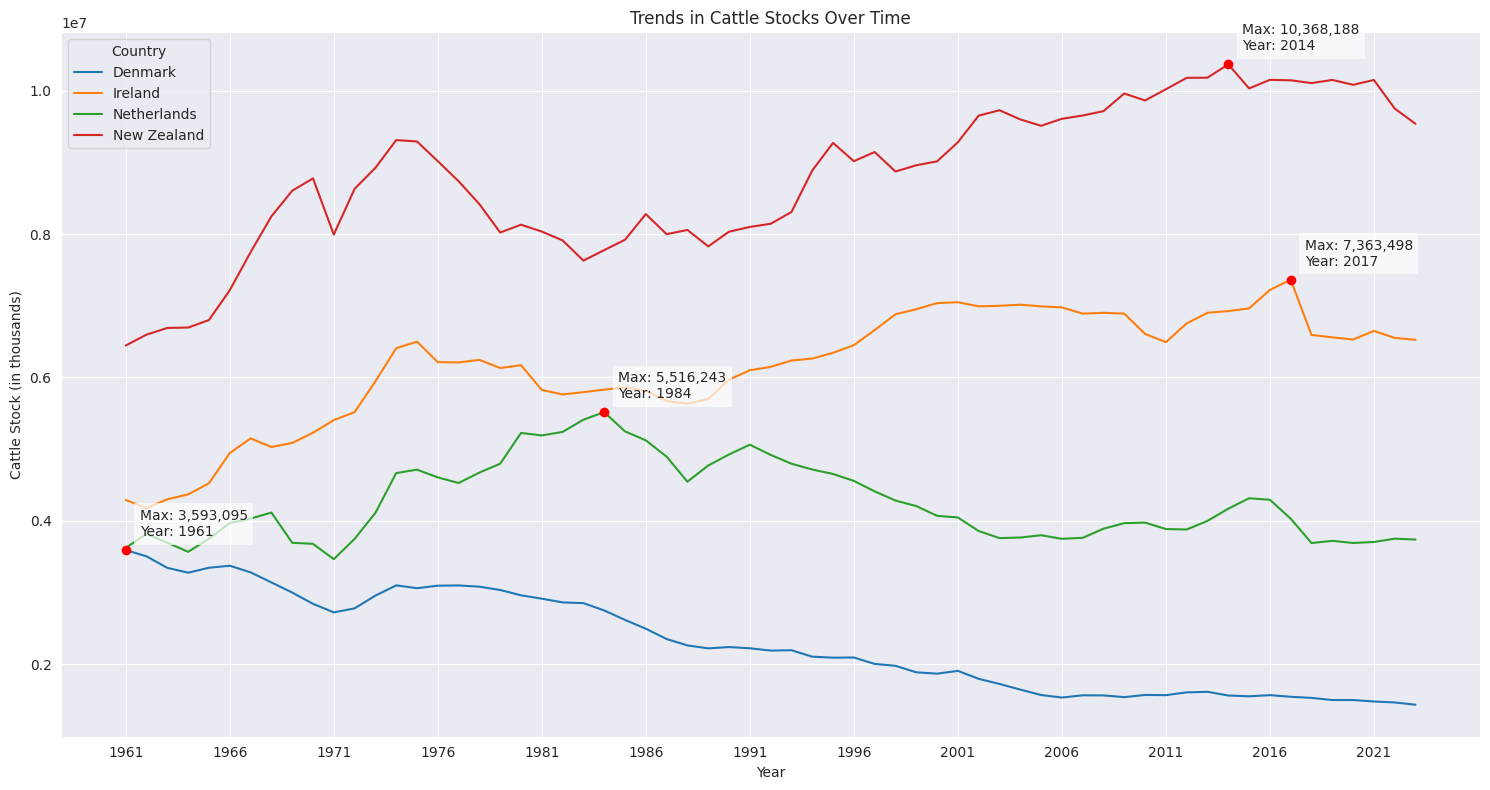

In [17]:
# Filter data for Cattle stocks
cattle_data = cleaned_df[(cleaned_df['Item'] == 'Cattle')]

# Filter Ireland and specific countries for comparison
countries_to_compare = ['Ireland', 'New Zealand', 'Denmark', 'Netherlands (Kingdom of the)']
cattle_data_filtered = cattle_data[cattle_data['Area'].isin(countries_to_compare)]

# Replace "Netherlands (Kingdom of the)" with "Netherlands" for better legend display
cattle_data_filtered['Area'] = cattle_data_filtered['Area'].replace({'Netherlands (Kingdom of the)': 'Netherlands'})

# Create the plot
plt.figure(figsize=(15, 8))
sns.lineplot(data=cattle_data_filtered, x='Year', y='Value', hue='Area')

# Find and plot maximum points for each unique country in the filtered data
for country in cattle_data_filtered['Area'].unique():
    country_data = cattle_data_filtered[cattle_data_filtered['Area'] == country]
    max_value = country_data['Value'].max()
    max_year = country_data[country_data['Value'] == max_value]['Year'].values[0]
    
    # Plot the maximum point
    plt.plot(max_year, max_value, 'ro')  # Red dot for maximum
    # Add annotation
    plt.annotate(f'Max: {int(max_value):,}\nYear: {int(max_year)}',
                xy=(max_year, max_value),
                xytext=(10, 10),
                textcoords='offset points',
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# Adjust x-axis ticks
year_ticks = cattle_data_filtered['Year'].unique()
plt.xticks(ticks=year_ticks[::5], labels=year_ticks[::5])  # Show every 5th year for readability

# Titles and labels
plt.title('Trends in Cattle Stocks Over Time')
plt.xlabel('Year')
plt.ylabel('Cattle Stock (in thousands)')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

Looking at Ireland's cattle stocks from 1961 to 2021, there's a notable long-term upward trend, with the country's herd size growing from around 4 million to over 7 million animals. The growth was particularly steady from the mid-1980s to 2017, when Ireland reached its peak of approximately 7.36 million cattle. However, there was a sharp decline between 2017 and 2018, dropping by roughly 1 million head of cattle, which could indicate significant policy changes, market conditions, or environmental pressures during that period. After this drop, the cattle numbers stabilized at around 6.5 million, suggesting a new equilibrium in the Irish cattle industry.

### **2. How do potato production trends in Ireland compare to other countries?**

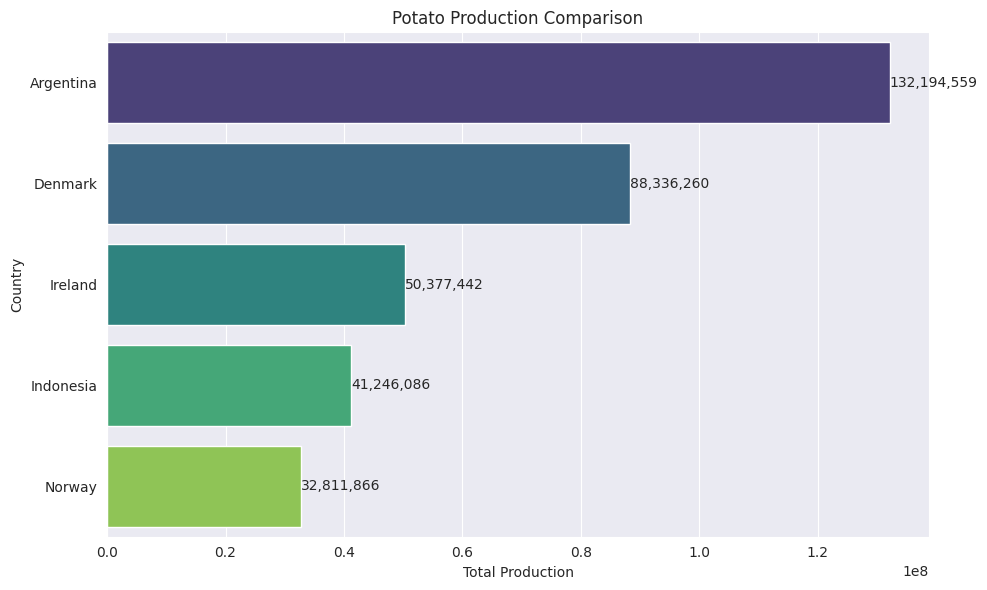

In [18]:
# Filter the data for Potatoes
potatoes_data = cleaned_df[(cleaned_df['Item'] == 'Potatoes') & (cleaned_df['Element'] == 'Production')]

# Filter for specific countries
selected_countries = ['Ireland', 'Denmark', 'Argentina', 'Norway', 'Indonesia']
filtered_potatoes = potatoes_data[potatoes_data['Area'].isin(selected_countries)]

# Aggregate the data by Area and sort in descending order of total production
potato_production = filtered_potatoes.groupby('Area')['Value'].sum().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=potato_production.values, y=potato_production.index, palette='viridis')

# Add value labels on the bars
for i, v in enumerate(potato_production.values):
    plt.text(v, i, f'{int(v):,}', va='center')

plt.title('Potato Production Comparison')
plt.xlabel('Total Production')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

Ireland has produced 50,377,442 tonnes of potatoes over the years, placing it third among the compared countries, behind Argentina (132,194,559) and Denmark (88,336,260), but ahead of Indonesia and Norway.

### **3. What are the trends in livestock stocks (Cattle, Sheep, Chickens) for Ireland over the past 20 years?**

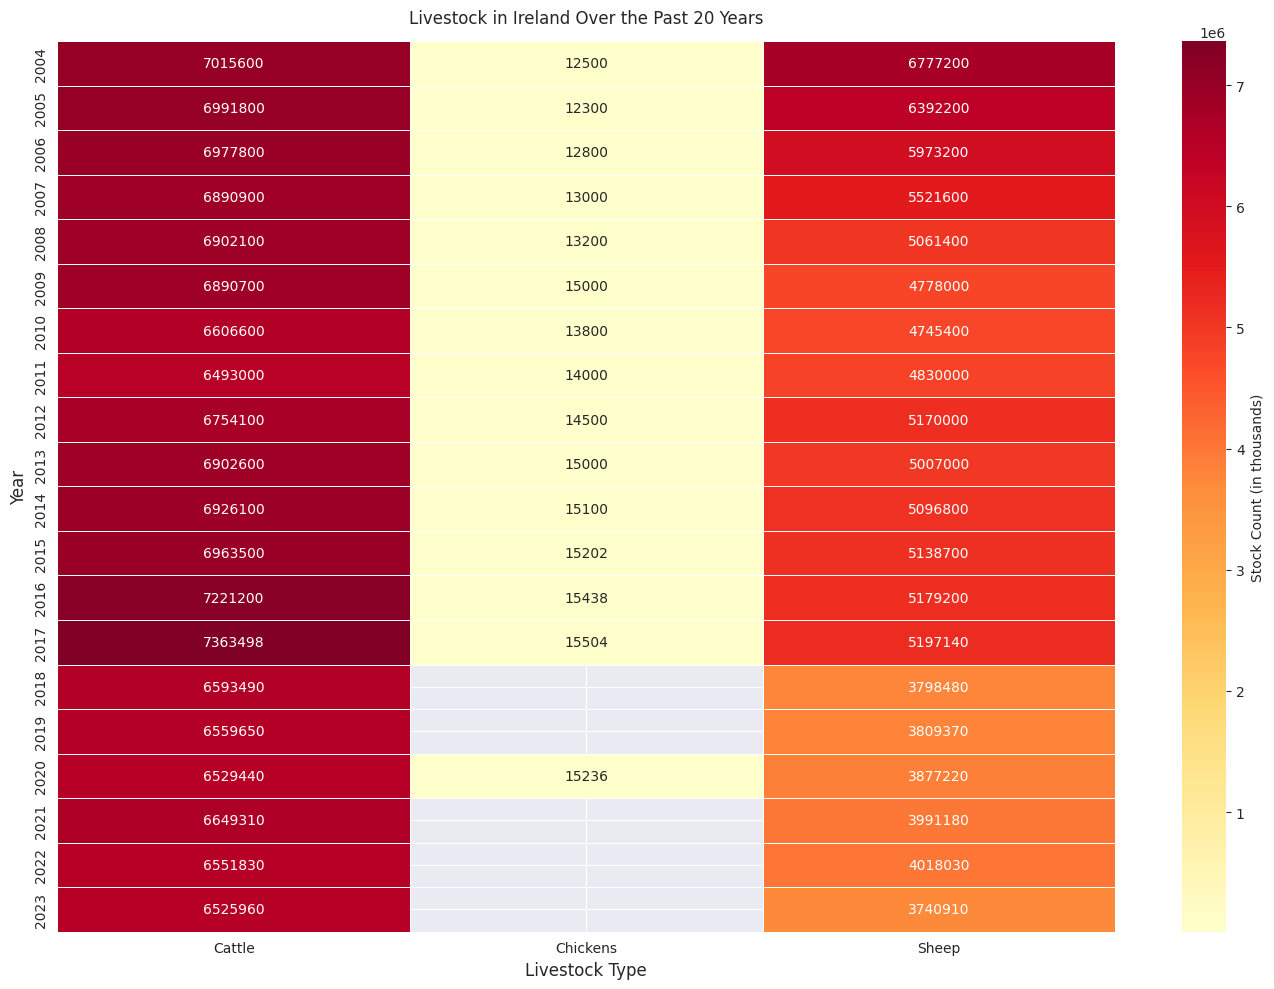

In [19]:
# Filter data for livestock in Ireland
livestock_items = ['Cattle', 'Sheep', 'Chickens']
livestock_data = cleaned_df[
    (cleaned_df['Item'].isin(livestock_items)) & 
    (cleaned_df['Element'] == 'Stocks') & 
    (cleaned_df['Area'] == 'Ireland')
]

# Pivot data for heatmap
heatmap_data = livestock_data.pivot_table(
    index='Year', 
    columns='Item', 
    values='Value', 
    aggfunc='sum'
)

plt.figure(figsize=(14, 10))  
sns.heatmap(
    heatmap_data.tail(20), 
    annot=True, 
    fmt=".0f", 
    cmap='YlOrRd', 
    cbar_kws={'label': 'Stock Count (in thousands)'},
    linewidths=0.5
)
plt.title('Livestock in Ireland Over the Past 20 Years', pad=13)
plt.xlabel('Livestock Type', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks()
plt.yticks()
plt.tight_layout()
plt.show()

Ireland's livestock industry from 2004 to 2023 shows distinct patterns across three main categories. Cattle numbers maintained relative stability around 6.9-7.0 million until reaching a peak of 7.36 million in 2017, before dropping sharply to about 6.5 million where it has since stabilized. Chicken numbers, though significantly smaller, demonstrated a consistent upward trend, starting at 12,500 in 2004 and gradually increasing to 15,504 by 2017, with notable jumps like the increase from 13,200 to 15,000 between 2008-2009, though recent years show some data gaps. Meanwhile, sheep populations experienced the most dramatic decline, starting at 6.77 million in 2004, falling to around 5 million in the mid-2010s, and dropping further after 2017 to settle around 3.7-4.0 million by 2023, with 2017 appearing to be a pivotal year for both cattle and sheep populations

<h2 style="background-color:black;color:white;border-radius: 8px; padding:15px">Statistical Data Analysis</h2>

In this section, I have summarised the data using descriptive statistics such as mean, median, percentiles, and others to gain insights. One notable observation is the absence of data for maize, leading me to exclude it from further analysis. The primary focus of my comparative data analysis will be on cattle, which will be explored in greater detail in the inferential statistics section.

In [20]:
# Suppress scientific notation and set precision to 2 decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

### **Descriptive Statistics**

In [21]:
# Filter for Ireland data
ireland_data = cleaned_df[cleaned_df['Area'] == 'Ireland']

#### **1. Mean**

In [22]:
mean_values = ireland_data.groupby(['Element', 'Item'])['Value'].mean()
mean_values

Element         Item        
Area harvested  Maize (corn)         0.00
                Potatoes         30285.35
Production      Maize (corn)         0.00
                Potatoes        799641.94
Stocks          Cattle         6160883.78
                Chickens         10341.74
                Sheep          4324525.87
Yield           Potatoes         29463.24
Name: Value, dtype: float64

The average values show that for crops like maize (corn), the area harvested and production are negligible, while potatoes show significant activity with an average production of 799,641.94 Tonnes and an average yield of 29,463.24 Kilograms per hectare. Livestock stocks indicate a high average count for cattle (6,160,883.78) and sheep (4,324,525.87).

#### **2. Median**

In [23]:
median_values = ireland_data.groupby(['Element', 'Item'])['Value'].median()
median_values

Element         Item        
Area harvested  Maize (corn)         0.00
                Potatoes         22400.00
Production      Maize (corn)         0.00
                Potatoes        618000.00
Stocks          Cattle         6263900.00
                Chickens          9096.00
                Sheep          3991180.00
Yield           Potatoes         27589.30
Name: Value, dtype: float64

The median values demonstrate central tendencies, with potatoes having a median production of 618,000 Tonnes and a median yield of 27,589.3 Kilograms per hectare. Cattle stocks are centered around 6,263,900.

#### **3. Mode**

In [24]:
mode_values = ireland_data.groupby(['Element', 'Item'])['Value'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
mode_values

Element         Item        
Area harvested  Maize (corn)         0.00
                Potatoes          9000.00
Production      Maize (corn)         0.00
                Potatoes        232000.00
Stocks          Cattle         4179200.00
                Chickens          8276.00
                Sheep          2343600.00
Yield           Potatoes         19000.00
Name: Value, dtype: float64

The mode values highlight the most frequently occurring data points. For potatoes, the most common area harvested is 9,000 Hectares, and the most frequent production level is 232,000 kilograms per hectare. In livestock, the most common cattle stock is 4,179,200, while sheep stocks frequently occur at 2,343,600

#### **4. Range**

In [25]:
range_values = ireland_data.groupby(['Element', 'Item'])['Value'].agg(lambda x: x.max() - x.min())
range_values

Element         Item        
Area harvested  Maize (corn)         0.00
                Potatoes         78027.00
Production      Maize (corn)         0.00
                Potatoes       1913000.00
Stocks          Cattle         3184298.00
                Chickens          8602.00
                Sheep          5211400.00
Yield           Potatoes         26632.70
Name: Value, dtype: float64

The range provides the difference between the maximum and minimum values. Potatoes show a range of 78,027 Hectares in area harvested and 1,913,000 Kilograms per hectare in production. For livestock, sheep stocks exhibit the largest range at 5,211,400 units, indicating significant variability.

#### **5. Variance**

In [26]:
variance_values = ireland_data.groupby(['Element', 'Item'])['Value'].var()
variance_values

Element         Item        
Area harvested  Maize (corn)               0.00
                Potatoes           479799639.65
Production      Maize (corn)               0.00
                Potatoes        255856391838.67
Stocks          Cattle          637054287126.21
                Chickens             7825749.28
                Sheep          2149458003782.69
Yield           Potatoes            47052165.45
Name: Value, dtype: float64

Sheep stocks showed the highest variance at 2.15e9, followed by cattle at 6.37e8, indicating substantial variability in livestock numbers. Potato production variance was 2.56e8, suggesting considerable year-to-year fluctuations.


#### **6. Standard Deviation**

In [27]:
# Calculate standard deviation for each group
std_dev_values = ireland_data.groupby(['Element', 'Item'])['Value'].std()
std_dev_values

Element         Item        
Area harvested  Maize (corn)         0.00
                Potatoes         21904.33
Production      Maize (corn)         0.00
                Potatoes        505822.49
Stocks          Cattle          798156.81
                Chickens          2797.45
                Sheep          1466103.00
Yield           Potatoes          6859.46
Name: Value, dtype: float64

Potato production has a high standard deviation of 505,822.49, and sheep stocks have the highest deviation at 1,466,103.00, emphasizing high variability in these categories

<Figure size 1200x1000 with 0 Axes>

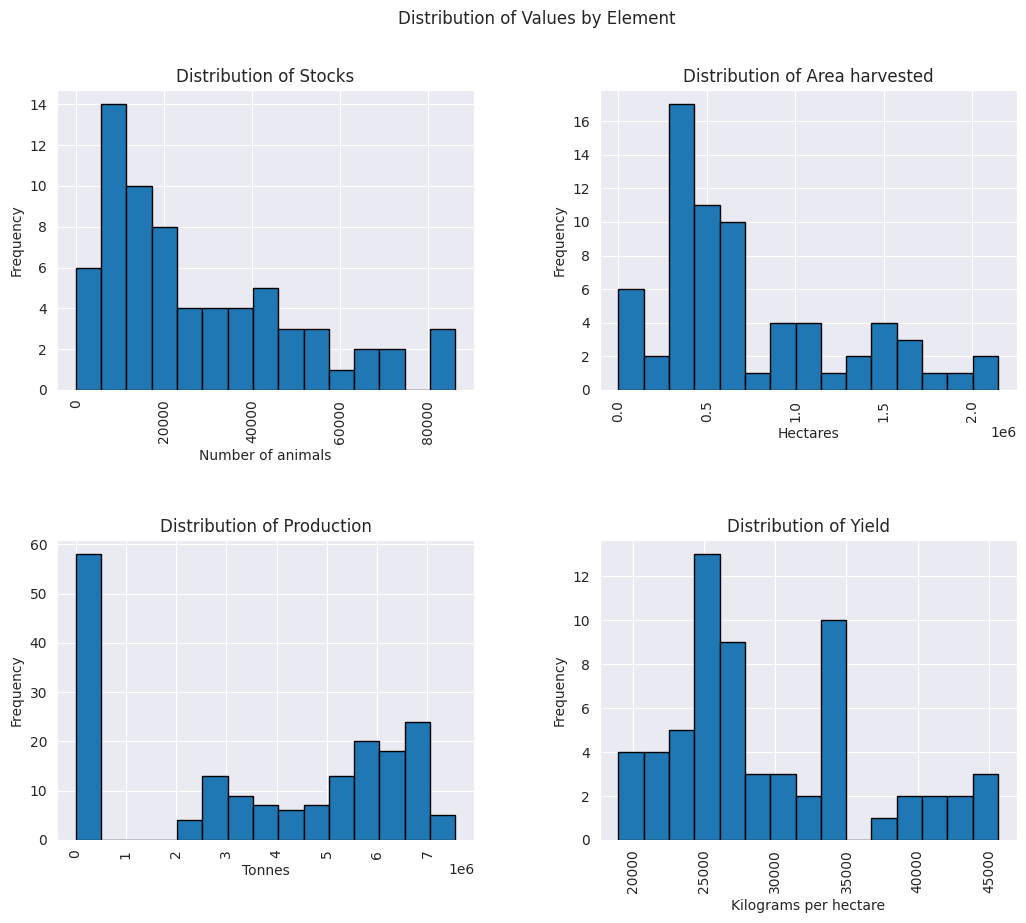

In [28]:
element_units = {
    'Production': 'Tonnes',
    'Area harvested': 'Hectares',
    'Yield': 'Kilograms per hectare',
    'Stocks': 'Number of animals'
}

plt.figure(figsize=(12, 10))

axes = ireland_data['Value'].hist(by=ireland_data['Element'], bins=15, layout=(2, 2), figsize=(12, 10), grid=False, edgecolor='black')

# Iterate over the axes and add x-labels dynamically
for ax, element in zip(axes.flatten(), ireland_data['Element'].unique()):
    if ax:  # Ensure valid subplot
        ax.set_xlabel(element_units.get(element, 'Value'))  # Default to 'Value' if unit not found
        ax.set_ylabel('Frequency')
        ax.set_title(f'Distribution of {element}')

plt.suptitle('Distribution of Values by Element')
plt.tight_layout(rect=[1, 1, 1, 0.96])  # Adjust layout to fit the title
plt.show();

#### **7. Skewness (Measure of Asymmetry)**

In [29]:
skewness_values = ireland_data.groupby(['Element', 'Item'])['Value'].apply(skew)
skewness_values

Element         Item        
Area harvested  Maize (corn)     NaN
                Potatoes        0.97
Production      Maize (corn)     NaN
                Potatoes        1.12
Stocks          Cattle         -0.86
                Chickens        0.52
                Sheep           0.38
Yield           Potatoes        0.74
Name: Value, dtype: float64

Potato data shows positive skewness (e.g., 0.97 for area harvested), indicating a long tail to the right. Cattle stocks exhibit negative skewness (-0.86), suggesting a left-tailed distribution

#### **8. Kurtosis (Measure of Tailedness)**

In [30]:
kurtosis_values = ireland_data.groupby(['Element', 'Item'])['Value'].apply(kurtosis)
kurtosis_values

Element         Item        
Area harvested  Maize (corn)     NaN
                Potatoes       -0.01
Production      Maize (corn)     NaN
                Potatoes        0.16
Stocks          Cattle          0.02
                Chickens       -1.19
                Sheep          -1.00
Yield           Potatoes       -0.33
Name: Value, dtype: float64

Kurtosis measures the peakedness of the data distribution. Potatoes production has near-zero kurtosis (0.16), indicating a distribution close to normal, while chicken stocks show negative kurtosis (-1.19), reflecting a flatter distribution

#### **9. Percentiles**

In [31]:
# Calculate percentiles (25th, 50th, 75th)
percentiles = ireland_data.groupby(['Element', 'Item'])['Value'].quantile([0.25, 0.5, 0.75]).unstack()
percentiles.columns = ['25th Percentile', '50th Percentile (Median)', '75th Percentile']
percentiles

25th Percentile  50th Percentile (Median)  \
Element        Item                                                      
Area harvested Maize (corn)             0.00                      0.00   
               Potatoes             11750.00                  22400.00   
Production     Maize (corn)             0.00                      0.00   
               Potatoes            409650.00                 618000.00   
Stocks         Cattle             5779200.00                6263900.00   
               Chickens              8103.25                   9096.00   
               Sheep              2926100.00                3991180.00   
Yield          Potatoes             24715.05                  27589.30   

                             75th Percentile  
Element        Item                           
Area harvested Maize (corn)             0.00  
               Potatoes             41398.50  
Production     Maize (corn)             0.00  
               Potatoes           1043950.00  
Stocks         Cattle             6886150.00  
               Chickens             12721.00  
               Sheep              5532500.00  
Yield          Potatoes             33725.80

For potatoes, 25% of the area harvested is less than or equal to 11,750 Hectares, and 75% is less than or equal to 41,398.5 Hectares. For cattle, the 75th percentile stock level is 6,886,150, showing the upper range of data distribution

#### **10. Interquartile Range (IQR)**

In [32]:
# Calculate IQR as the difference between 75th and 25th percentiles
iqr_values = percentiles['75th Percentile'] - percentiles['25th Percentile']
iqr_values

Element         Item        
Area harvested  Maize (corn)         0.00
                Potatoes         29648.50
Production      Maize (corn)         0.00
                Potatoes        634300.00
Stocks          Cattle         1106950.00
                Chickens          4617.75
                Sheep          2606400.00
Yield           Potatoes          9010.75
dtype: float64

The IQR highlights the spread of the middle 50% of the data. The interquartile range for potato production was 634,300 tonnes, while cattle showed an IQR of 1.11 million heads. Sheep stocks had an IQR of 2.61 million heads, demonstrating considerable spread in the middle 50% of the data.

### **Inferential Statistics**

In this section, I applied at least five statistical tests to compare Ireland with three other countries: **New Zealand**, **Germany**, and **Poland**. The goal was to assess similarities and differences between Ireland and the selected countries using various inferential statistical methods.

I focused specifically on cattle stock data, comparing different metrics such as mean, distribution, variance, and associations between variables. The statistical tests employed include:

- Shapiro-Wilk Test for Normality
- Levene's Test for Homogeneity of Variance
- T-test (Independent samples)
- Mann-Whitney U Test (Non-parametric)
- Kruskal-Wallis Test (Non-parametric)
- Chi-Squared Test for Independence
- Wilcoxon Signed-Rank Test

These tests help identify if significant differences exist and whether the assumptions for parametric or non-parametric tests are met.

Also, it is worth mentioning that the significance level used is 0.05

In [33]:
def perform_statistical_tests(ireland_data, comparison_data, country_name):
    """
    Performs a series of inferential statistical tests to compare Ireland's cattle agricultural data with another country's data.
    
    Parameters:
    ireland_data (pandas.Series or numpy.ndarray): The cattle data for Ireland.
    comparison_data (pandas.Series or numpy.ndarray): The cattle data for the country being compared to Ireland.
    country_name (str): The name of the country being compared with Ireland (e.g., 'New Zealand', 'Germany', 'Poland').
    
    Returns:
    None: The function prints the results of each test directly to the console.
    
    Statistical Tests Performed:
    - Shapiro-Wilk Test for normality (tests if the data follows a normal distribution).
    - Levene's Test for homogeneity of variance (tests if variances are equal across the groups).
    - Independent T-Test (tests if means of two independent groups are different).
    - Mann-Whitney U Test (non-parametric alternative to the T-test for comparing means).
    - Wilcoxon Signed-Rank Test (non-parametric test for paired data).
    - Kolmogorov-Smirnov Test (compares distributions of two samples).
    - Kruskal-Wallis Test (non-parametric test to compare means between more than two groups).
    
    The results for each test, including the test statistic and p-value, are printed for both Ireland and the comparison country.
    """
    
    # Shapiro-Wilk Test for normality
    stat_ireland, p_ireland = shapiro(ireland_data)
    stat_comparison, p_comparison = shapiro(comparison_data)
    print(f"Ireland: Shapiro-Wilk Test -> Statistic: {stat_ireland}, p-value: {p_ireland}")
    print(f"{country_name}: Shapiro-Wilk Test -> Statistic: {stat_comparison}, p-value: {p_comparison}", end="\n\n")

    # Levene's Test for equality of variances
    stat, p_value = levene(ireland_data, comparison_data)
    print(f"Levene's Test -> Statistic: {stat}, p-value: {p_value}", end="\n\n")

    # Independent T-Test for comparing means
    stat, p_value = ttest_ind(ireland_data, comparison_data, equal_var=(p_value > 0.05))
    print(f"T-Test -> Statistic: {stat}, p-value: {p_value}", end="\n\n")

    # Mann-Whitney U Test (non-parametric alternative to the T-test)
    stat, p_value = mannwhitneyu(ireland_data, comparison_data)
    print(f"Mann-Whitney U Test -> Statistic: {stat}, p-value: {p_value}", end="\n\n")

    # Wilcoxon Signed-Rank Test (for paired data, using equal length)
    min_length = min(len(ireland_data), len(comparison_data))
    ireland_w = ireland_data[:min_length]
    comparison_w = comparison_data[:min_length]
    stat, p_value = wilcoxon(ireland_w, comparison_w)
    print(f"Wilcoxon Test -> Statistic: {stat}, p-value: {p_value}", end="\n\n")

    # Kolmogorov-Smirnov Test (compare distributions)
    stat, p_value = ks_2samp(ireland_data, comparison_data)
    print(f"Kolmogorov-Smirnov Test (Ireland vs {country_name}):")
    print(f"Statistic: {stat}, p-value: {p_value}", end="\n\n")

    # Kruskal-Wallis Test (non-parametric version of ANOVA)
    stat, p_value = kruskal(ireland_data, comparison_data)
    print(f"Kruskal-Wallis Test (Ireland vs {country_name}):")
    print(f"Statistic: {stat}, p-value: {p_value}", end="\n\n")


#### **1. Statistical Tests for Ireland and New Zealand**

In [34]:
# Extract cattle data for Ireland and New Zealand
data_ireland = cleaned_df[(cleaned_df['Area'] == 'Ireland') & (cleaned_df['Item'] == 'Cattle')]['Value']
data_nz = cleaned_df[(cleaned_df['Area'] == 'New Zealand') & (cleaned_df['Item'] == 'Cattle')]['Value']

In [35]:
perform_statistical_tests(data_ireland, data_nz, 'New Zealand')

Ireland: Shapiro-Wilk Test -> Statistic: 0.919225643304344, p-value: 0.0005142357342345758
New Zealand: Shapiro-Wilk Test -> Statistic: 0.9443659108959555, p-value: 0.006630917404189834

Levene's Test -> Statistic: 6.58123575012527, p-value: 0.011496963053957358

T-Test -> Statistic: -15.968160787967987, p-value: 4.735561054084277e-31

Mann-Whitney U Test -> Statistic: 105.0, p-value: 4.8183936233083806e-20

Wilcoxon Test -> Statistic: 0.0, p-value: 5.16839481363226e-12

Kolmogorov-Smirnov Test (Ireland vs New Zealand):
Statistic: 0.9047619047619048, p-value: 1.6322155037227367e-27

Kruskal-Wallis Test (Ireland vs New Zealand):
Statistic: 84.09711286089242, p-value: 4.7105811683490585e-20



#### **2. Statistical Tests for Ireland and Germany**

In [36]:
# Extract cattle data for Germany
data_germany = cleaned_df[(cleaned_df['Area'] == 'Germany') & (cleaned_df['Item'] == 'Cattle')]['Value']

In [37]:
perform_statistical_tests(data_ireland, data_germany, 'Germany')

Ireland: Shapiro-Wilk Test -> Statistic: 0.919225643304344, p-value: 0.0005142357342345758
Germany: Shapiro-Wilk Test -> Statistic: 0.9026881049824329, p-value: 0.00011424677737307762

Levene's Test -> Statistic: 147.1904180208659, p-value: 8.1908476710846e-23

T-Test -> Statistic: -23.028546635935637, p-value: 5.723649530256082e-34

Mann-Whitney U Test -> Statistic: 0.0, p-value: 3.6555663930078464e-22

Wilcoxon Test -> Statistic: 0.0, p-value: 5.16839481363226e-12

Kolmogorov-Smirnov Test (Ireland vs Germany):
Statistic: 1.0, p-value: 3.3140376607052e-37

Kruskal-Wallis Test (Ireland vs Germany):
Statistic: 93.75590551181102, p-value: 3.569355687242378e-22



#### **3. Statistical Tests for Ireland and Poland**

In [38]:
# Extract cattle data for Poland
data_poland = cleaned_df[(cleaned_df['Area'] == 'Poland') & (cleaned_df['Item'] == 'Cattle')]['Value']

In [39]:
perform_statistical_tests(data_ireland, data_poland, 'Poland')

Ireland: Shapiro-Wilk Test -> Statistic: 0.919225643304344, p-value: 0.0005142357342345758
Poland: Shapiro-Wilk Test -> Statistic: 0.8770198968747986, p-value: 1.3870887978061882e-05

Levene's Test -> Statistic: 139.55861415379005, p-value: 4.8658622520637825e-22

T-Test -> Statistic: -7.153507636832043, p-value: 5.436388895791455e-10

Mann-Whitney U Test -> Statistic: 1067.0, p-value: 7.66899584204894e-06

Wilcoxon Test -> Statistic: 409.0, p-value: 4.116951883384937e-05

Kolmogorov-Smirnov Test (Ireland vs Poland):
Statistic: 0.5555555555555556, p-value: 2.73523446402189e-09

Kruskal-Wallis Test (Ireland vs Poland):
Statistic: 20.04050088976976, p-value: 7.581921129403584e-06



#### **Hypotheses:**

* **Normality:** 
    * **Null Hypothesis (H0):** The data for Ireland and the comparison country are normally distributed.
    * **Alternative Hypothesis (H1):** The data for Ireland and/or the comparison country are not normally distributed.

* **Homogeneity of Variance:**
    * **H0:** The variances of the cattle data for Ireland and the comparison country are equal.
    * **H1:** The variances of the cattle data for Ireland and the comparison country are not equal.

* **Mean Differences:**
    * **H0:** There is no significant difference in the mean cattle data between Ireland and the comparison country.
    * **H1:** There is a significant difference in the mean cattle data between Ireland and the comparison country.

#### **Conclusions:**

* **Normality:** The Shapiro-Wilk test indicates that the Irish cattle data is **not normally distributed** (p-value < 0.05) in all three comparisons. This means that parametric tests such as the t-test may not be appropriate, and non-parametric methods might be preferred.

* **Homogeneity of Variance:** In all comparisons, Levene's Test suggests that the **variances are not equal** (p-value < 0.05). This violates the assumption of equal variances for the independent t-test.

* **Mean Differences:**

    * **T-test:** Due to the violation of the homogeneity of variance assumption, the results of the t-test might not be reliable. 

    * **Mann-Whitney U Test:** The Mann-Whitney U Test, which does not assume normality or equal variances, consistently shows significant differences (p < 0.05) between Ireland and all comparison countries.

    * **Wilcoxon Signed-Rank Test:** This test, designed for paired data, also shows significant differences between Ireland and all comparison countries (p-value < 0.05). However, it's important to note that the data may not be truly paired.

    * **Kolmogorov-Smirnov Test:** This test compares the entire distribution of the data. It strongly suggests significant differences in the distributions between Ireland and all comparison countries (p-values < 0.05).

    * **Kruskal-Wallis Test:** This non-parametric test, similar to ANOVA, also indicates significant differences in the mean cattle data between Ireland and all comparison countries (p-values < 0.05).

#### **Overall Conclusion:**
1. All three comparisons show statistically significant differences from Ireland's cattle agricultural patterns, but with varying degrees: Germany shows the most extreme differences; New Zealand shows very strong differences; Poland shows significant but less extreme differences. 

2. The data characteristics suggest that non-parametric tests (Mann-Whitney U, Wilcoxon, Kruskal-Wallis) provide more reliable comparisons than the t-test due to: non-normal distributions in all countries and unequal variances between groups.

3. The patterns suggest distinct agricultural systems and approaches to cattle farming across these countries, with Ireland's system being particularly different from Germany's.

<h2 style="background-color:black;color:white;border-radius: 8px; padding:15px">Machine Learning</h2>

In this section...

### **Time Series Forecasting**

### **Supervised Learning**